In [2]:
import pandas as pd

In [3]:
#df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv")
df = pd.read_csv("G:\INeuron_data_science_assignment\Electric_Vehicle_Population_Data.csv")

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
#checking for duplicate values
df.duplicated().sum()

0

In [9]:
# define numerical & categorical columns
def cat(dataframe):
    categorical_features=[feature for feature in dataframe.columns if df[feature].dtypes == 'O']
    print("No. of Categorical feature : ",len(categorical_features))
    print(categorical_features)

def num(dataframe):
    numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
    print("No. of Numerical feature : ",len(numerical_features),"\n")
    discrete_features=[feature for feature in numerical_features if dataframe[feature].nunique() <25 ]
    continous_features=[feature for feature in numerical_features if feature not in discrete_features]
    print("No. of Discrete feature : ",len(discrete_features))
    print(discrete_features,'\n')
    print("No. of Continous feature : ",len(continous_features))
    print(continous_features)

In [10]:
cat(df)

No. of Categorical feature :  10
['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [11]:
num(df)

No. of Numerical feature :  7 

No. of Discrete feature :  1
['Model Year'] 

No. of Continous feature :  6
['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [12]:
#checking unique values in every column
df.nunique()

VIN (1-10)                                             8787
County                                                   39
City                                                    449
State                                                     1
Postal Code                                             520
Model Year                                               21
Make                                                     35
Model                                                   121
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       129889
Vehicle Location                                        520
Electric Utility                                         74
2020 Census Tract                       

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,129889.0,9.825913e+04,3.034293e+02,9.800100e+04,9.805200e+04,9.812100e+04,9.837000e+04,9.940300e+04
Model Year,129889.0,2.019550e+03,2.988153e+00,1.997000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,129889.0,7.684661e+01,9.945797e+01,0.000000e+00,0.000000e+00,2.400000e+01,1.510000e+02,3.370000e+02
Base MSRP,129889.0,1.498088e+03,9.849540e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,129889.0,2.957437e+01,1.477010e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,129889.0,2.051591e+08,8.718272e+07,4.385000e+03,1.567782e+08,2.034371e+08,2.289181e+08,4.792548e+08
2020 Census Tract,129889.0,5.303962e+10,1.617584e+07,5.300195e+10,5.303301e+10,5.303303e+10,5.305307e+10,5.307794e+10


In [14]:
df.describe(include='object').T

,count,unique,top,freq
VIN (1-10),129889,8787,5YJYGDEE0M,466
County,129889,39,King,68333
City,129889,449,Seattle,22819
State,129889,1,WA,129889
Make,129889,35,TESLA,59483
Model,129889,121,MODEL 3,25230
Electric Vehicle Type,129889,2,Battery Electric Vehicle (BEV),99716
Clean Alternative Fuel Vehicle (CAFV) Eligibility,129889,3,Clean Alternative Fuel Vehicle Eligible,60402
Vehicle Location,129889,520,POINT (-122.13158 47.67858),3379
Electric Utility,129889,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),47408


In [15]:
#checking correlation
df.corr(numeric_only=True)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.054524,-0.017145,-0.007924,-0.423466,-0.003243,0.016945
Model Year,-0.054524,1.000000,-0.374371,-0.226503,-0.004596,-0.008264,-0.027516
Electric Range,-0.017145,-0.374371,1.000000,0.093457,0.027038,-0.015204,-0.012109
Base MSRP,-0.007924,-0.226503,0.093457,1.000000,0.013490,-0.006733,-0.000736
Legislative District,-0.423466,-0.004596,0.027038,0.013490,1.000000,-0.006203,-0.106419
DOL Vehicle ID,-0.003243,-0.008264,-0.015204,-0.006733,-0.006203,1.000000,-0.002694
2020 Census Tract,0.016945,-0.027516,-0.012109,-0.000736,-0.106419,-0.002694,1.000000


- Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [16]:
#changing values for easy read
df.loc[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=='Clean Alternative Fuel Vehicle Eligible',["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]] = 'Eligible'
df.loc[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=='Not eligible due to low battery range',["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]] = 'Not Eligible'
df.loc[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=='Eligibility unknown as battery range has not been researched',["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]] = 'Unknown'


In [17]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Eligible', 'Not Eligible', 'Unknown'], dtype=object)

In [18]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not Eligible'][['Make','Electric Vehicle Type']]

,Make,Electric Vehicle Type
6,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...
130377,BMW,Plug-in Hybrid Electric Vehicle (PHEV)
130385,AUDI,Plug-in Hybrid Electric Vehicle (PHEV)
130390,JEEP,Plug-in Hybrid Electric Vehicle (PHEV)
130407,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV)


- Get all TESLA cars with the model year, and model type made in Bothell City.

In [19]:
df[(df['Make']=='TESLA') & (df['City']=='Bothell')][['Model Year','Model']]

,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


- Get all the cars that have an electric range of more than 100, and were made after 2015

In [20]:
df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Make', 'Model']]

,Make,Model
0,TESLA,MODEL X
2,TESLA,MODEL 3
4,TESLA,MODEL S
12,TESLA,MODEL 3
13,TESLA,MODEL 3
...,...,...
130417,TESLA,MODEL Y
130428,NISSAN,LEAF
130432,TESLA,MODEL Y
130436,TESLA,MODEL 3


- Draw plots to show the distribution between city and electric vehicle type

<Axes: >

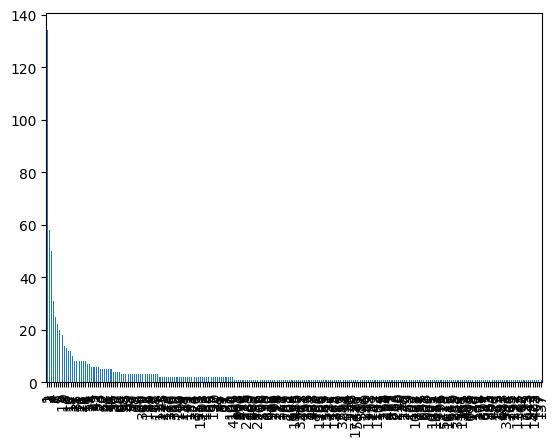

In [21]:
df1 = df.groupby(['City'])['Electric Vehicle Type'].value_counts()
df1.value_counts().plot(kind='bar')